In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import glob
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# filterwarnings to ignore all unnecessary warnings and logs
import warnings
warnings.filterwarnings('ignore')

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [21]:
#read the data files
Phone_data_5=pd.read_csv('phone_user_review_file_5.csv',header=None)
Phone_data_4=pd.read_csv('phone_user_review_file_4.csv',header=None)
Phone_data_3=pd.read_csv('phone_user_review_file_3.csv',header=None)
Phone_data_2=pd.read_csv('phone_user_review_file_2.csv',header=None)
Phone_data_1=pd.read_csv('phone_user_review_file_1.csv',header=None)
Phone_data_6=pd.read_csv('phone_user_review_file_6.csv',header=None)

In [28]:
Phone_data = pd.concat([Phone_data_1, Phone_data_2,Phone_data_3,Phone_data_4,Phone_data_5,Phone_data_6])

In [29]:
Phone_data.shape

(1415139, 11)

In [30]:
Phone_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
3,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
4,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)


In [25]:
print(Phone_data.index)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            163828, 163829, 163830, 163831, 163832, 163833, 163834, 163835,
            163836, 163837],
           dtype='int64', length=1415139)


In [31]:
Phone_data.columns = Phone_data.iloc[0]
Phone_data = Phone_data[1:]

In [32]:
Phone_data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
3,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
4,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
5,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [60]:
df=Phone_data.copy()

In [61]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
3,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
4,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
5,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [62]:
df.dtypes

0
phone_url    object
date         object
lang         object
country      object
source       object
domain       object
score        object
score_max    object
extract      object
author       object
product      object
dtype: object

In [63]:
df=df.drop(['phone_url','date','lang','country','source','domain'],axis=1)

In [64]:
df.head()

,score,score_max,extract,author,product
1,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
2,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
3,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
4,9.2,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
5,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [65]:
df.shape


(1415138, 5)

In [54]:
df.isnull().any()

0
score        True
score_max    True
extract      True
author       True
product      True
dtype: bool

In [66]:
# Check for missing values present
print('Number of missing values across columns-\n', df.isnull().sum())


Number of missing values across columns-
 0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64


In [86]:
df1=df.dropna(subset=['extract', 'product'])

In [87]:
print('Number of missing values across columns-\n', df1.isnull().sum())


Number of missing values across columns-
 0
score        63073
score_max    63073
extract          0
author       59355
product          0
dtype: int64


In [89]:
df3=df1

In [88]:
df2=df1.fillna('NaN')

In [79]:
df2.dtypes

0
score        object
score_max    object
extract      object
author       object
product      object
dtype: object

In [90]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=None, strategy='most_frequent')

df3 = imputer.fit_transform(df3.values.reshape(-1,1))[:,0]

df3

ValueError: Input contains NaN

In [82]:
import pandas as pd


trainingData = df2.iloc[:, :].values
dataset = df2.iloc[:, :].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='most_frequent')

#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values="0", strategy="most_frequent", axis = 0)
imputer = imputer.fit(trainingData[:, 1:2])
dataset[:, 1:2] = imputer.transform(dataset[:, 1:2])

In [84]:
dataset

array([['10', '10',
        'As a diehard Samsung fan who has had every Samsung phone since before the S series started, this has been my favorite upgrade so far. I am amazed at some of the reviews and think people may just have a defective device that needs to be replaced. The battery life is amazing.',
        'CarolAnn35', 'Samsung Galaxy S8'],
       ['10', '10',
        'Love the phone. the phone is sleek and smooth and beautiful I highly recommend the phone you will not regret getting this phone.',
        'james0923', 'Samsung Galaxy S8'],
       ['6', '10',
        "Adequate feel. Nice heft. Processor's still sluggish for the few apps that I have installed. Samsung wants to vacuum all of your data with their apps that requires more access than needed. What else is new.",
        'R. Craig',
        'Samsung Galaxy S8 (64GB) G950U 5.8" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)'],
       ...,
       [2.0, 10.0,
        'Jetzt hat wohl Alcatell gedacht ,sie machen wa

In [91]:
dfstd = pd.DataFrame(dataset)

In [92]:
dfstd.head()

,0,1,2,3,4
0,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9.2,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [93]:
print('Number of missing values across columns-\n', dfstd.isnull().sum())

Number of missing values across columns-
 0    0
1    0
2    0
3    0
4    0
dtype: int64


In [96]:
dfstd.columns = ['Score','Scoremax','Extract','Author','Phone']
dfstd.head()

,Score,Scoremax,Extract,Author,Phone
0,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9.2,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [102]:
df5=dfstd

In [103]:
randomState = 612
sampleSize = 1000000
#df = pd.read_csv(filePath, delim_whitespace=True)
df_s = df5.sample(n=sampleSize, random_state=randomState)

In [141]:
df_s.shape

(1000000, 5)

In [142]:
df_s.dtypes

Score       object
Scoremax    object
Extract     object
Author      object
Phone       object
dtype: object

In [143]:
df_new=df_s
df_new.head()

,Score,Scoremax,Extract,Author,Phone
362640,8.0,10.0,"apart from the camera quality, everything abou...",Vishal Jain,"OnePlus X (Onyx, 16GB)"
889326,2.0,10.0,Sony Ericsson Xperia arc S ?????? ???�????????...,sonymulti,Sony Xperia P
206546,6.0,10.0,J'ai eu la malchance de tomber sur un modèle d...,Client d'Amazon,"Google Nexus 5 x Smartphone (13,2 cm (5,2 pouc..."
1280240,3.2,10,this is the first phone i got. it is huge. if ...,Moon,Nokia 5300 XpressMusic
241244,8.0,10.0,Esperienza d'uso. Pro: Dimensioni e peso a mio...,Tommy,"Motorola Moto X (2 Generazione) Smartphone, Di..."


In [144]:
df_new = df_new.infer_objects()
df_new.dtypes

Score       object
Scoremax    object
Extract     object
Author      object
Phone       object
dtype: object

In [145]:
df_new.convert_dtypes().dtypes

Score       object
Scoremax    object
Extract     string
Author      object
Phone       string
dtype: object

In [146]:
#df_new['Score'] = df_new['Score'].astype(float, errors = 'raise')
df_new['Score'] = pd.to_numeric(df_new['Score'],errors = 'coerce')
df_new['Scoremax'] = pd.to_numeric(df_new['Scoremax'],errors = 'coerce')

In [147]:
df_new.dtypes

Score       float64
Scoremax    float64
Extract      object
Author       object
Phone        object
dtype: object

In [150]:
df_new.head()

,Score,Scoremax,Extract,Author,Phone
362640,8.0,10.0,"apart from the camera quality, everything abou...",Vishal Jain,"OnePlus X (Onyx, 16GB)"
889326,2.0,10.0,Sony Ericsson Xperia arc S ?????? ???�????????...,sonymulti,Sony Xperia P
206546,6.0,10.0,J'ai eu la malchance de tomber sur un modèle d...,Client d'Amazon,"Google Nexus 5 x Smartphone (13,2 cm (5,2 pouc..."
1280240,3.2,10.0,this is the first phone i got. it is huge. if ...,Moon,Nokia 5300 XpressMusic
241244,8.0,10.0,Esperienza d'uso. Pro: Dimensioni e peso a mio...,Tommy,"Motorola Moto X (2 Generazione) Smartphone, Di..."


In [151]:
dfpb=df_new.copy()

In [152]:
dfpb['Score'].describe().transpose()

count    999996.000000
mean          7.643867
std           3.052191
min           0.000000
25%           6.000000
50%           8.400000
75%          10.000000
max          10.000000
Name: Score, dtype: float64

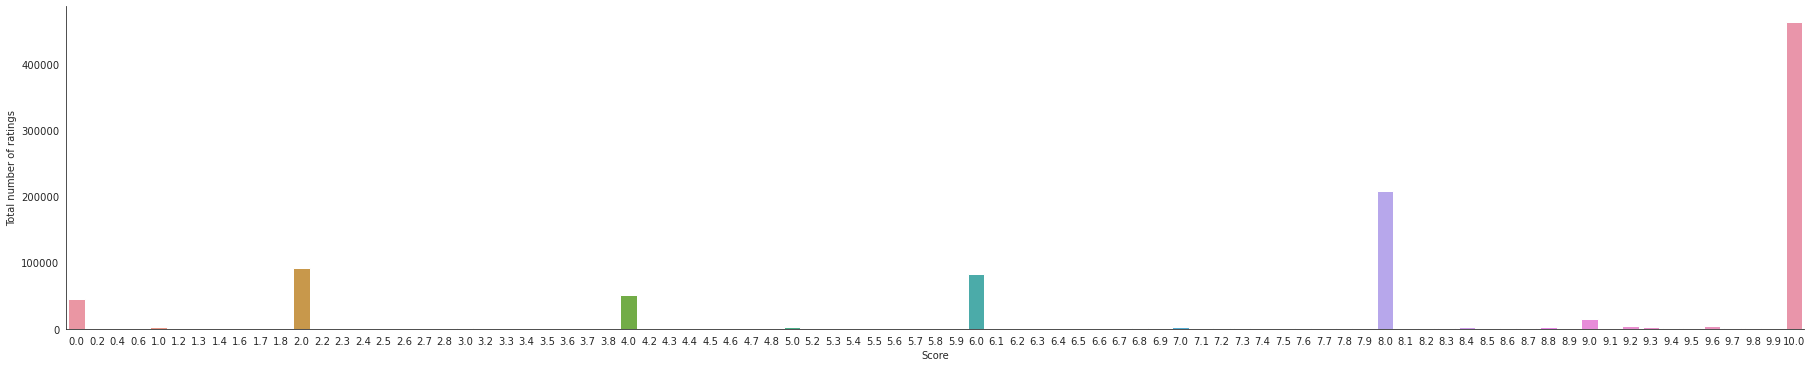

In [154]:
with sns.axes_style('white'):
    g = sns.factorplot("Score", data=dfpb, aspect=5,kind='count')
    g.set_ylabels("Total number of ratings") 

In [157]:
most_rated = dfpb.Author.value_counts()

In [158]:
most_rated

Amazon Customer    55164
0                  42639
Cliente Amazon     13850
e-bit               6143
Client d'Amazon     5508
                   ...  
Mircea Florian         1
sniptheelf             1
jection                1
Gafiatullin            1
msm51                  1
Name: Author, Length: 595020, dtype: int64

In [159]:
top_fifty = dfpb.Author.value_counts().rename_axis('Author').reset_index(name='No. of reviews')

In [160]:
top_fifty.head()

,Author,No. of reviews
0,Amazon Customer,55164
1,0,42639
2,Cliente Amazon,13850
3,e-bit,6143
4,Client d'Amazon,5508


In [162]:
# Dropping the users who have rated less than 50 products.
Review_df = dfpb[dfpb.Author.isin(top_fifty[top_fifty['No. of reviews'] >= 50].Author)]

In [163]:
# number of unique users now who have atleast rated 50 products
Review_df.Author.nunique()

645

In [164]:
# number of unique products now
Review_df.Phone.nunique()

27485

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
train_set,test_set = train_test_split(Review_df('Author','Phone'), test_size=0.3, random_state=9999)

TypeError: 'DataFrame' object is not callable

In [167]:
train_set.head()

,Score,Scoremax,Extract,Author,Phone
326975,10.0,10.0,+ unschlagbare Preis/Leistung + habe das Moto ...,Marco,"Lenovo Motorola Moto G Smartphone (11,4 cm (4,..."
555393,10.0,10.0,Awesome product in this price,Amazon Customer,YU Yuphoria YU5010A (Black+Silver)
765008,10.0,10.0,Ho ordinato questo articolo è il mio primo sma...,Cliente Amazon,"Huawei Ascend G510 Smartphone, 4 GB, Bianco"
1061009,0.0,10.0,"iPhone'u biraz büyük bulabilirsiniz, en azında...",bumudur,Apple iPhone 3GS 32GB
906476,8.0,10.0,"Produto bom. Não é nenhum Smartphone, portanto...",e-bit,Celular Motorola EX117
